In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-may-2022/test.csv')
sample_sub = pd.read_csv('../input/tabular-playground-series-may-2022/sample_submission.csv')

In [3]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

No null values, all features except f_27 are numerical 

In [5]:
train['f_27'].nunique()

741354

In [6]:
train['f_27'].value_counts()

BBBBBBCJBC    12
BCBBBBCLBC    12
BBBBBBDPCB    10
BBBBBBDKBC    10
ADBBBACQBC    10
              ..
BFAFAADTCE     1
BBBDAACOAE     1
BBABAACGBB     1
BFAABAGSDB     1
BCAACADSCE     1
Name: f_27, Length: 741354, dtype: int64

In [7]:
corr_df = train.drop('f_27',axis=1)

<AxesSubplot:>

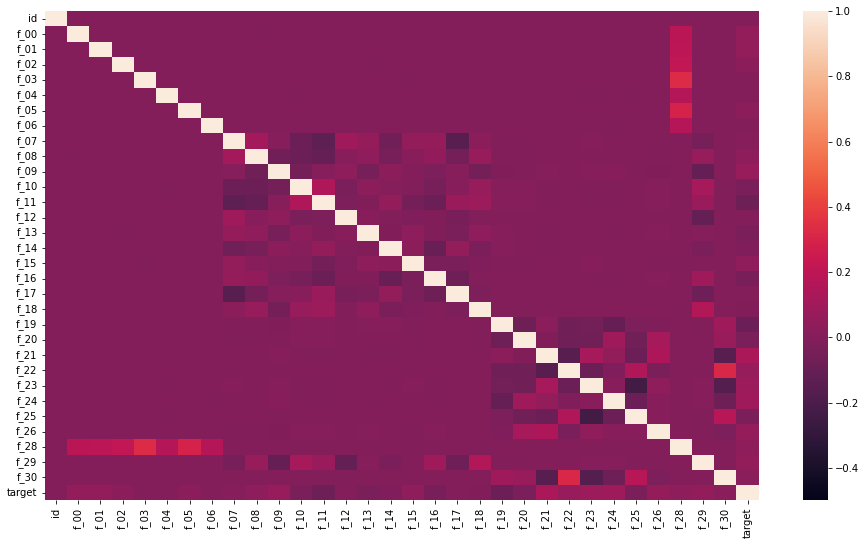

In [8]:
corr = corr_df.corr()

plt.figure(figsize=(16,9))
sns.heatmap(corr,vmin=-0.5,vmax=1)

From this heatmap it can be seen that there are some correlation among the features, 

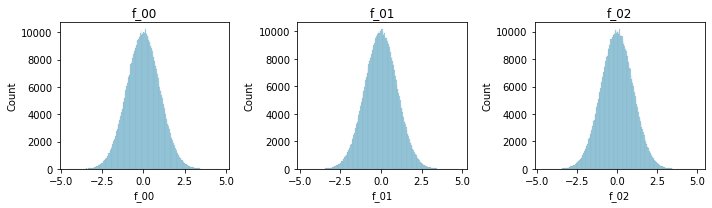

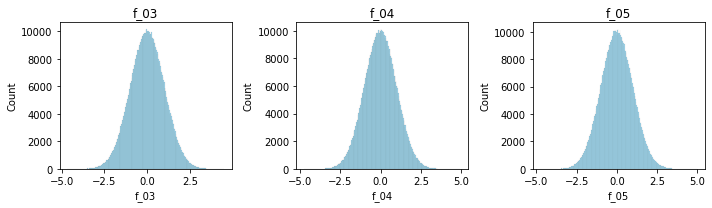

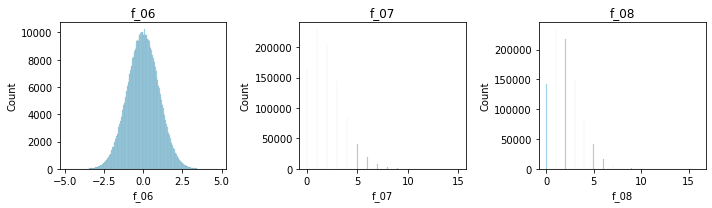

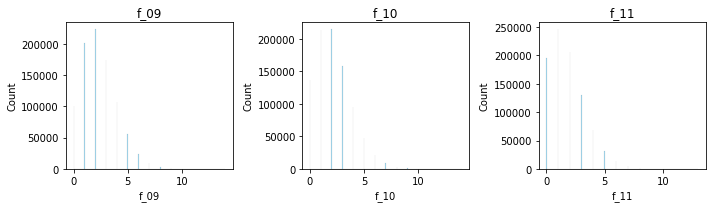

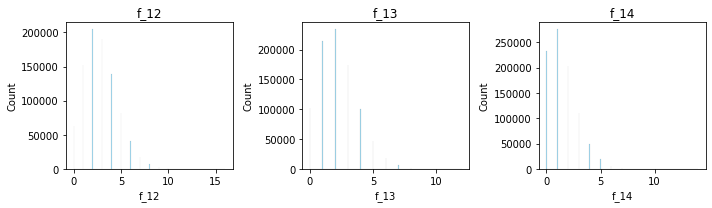

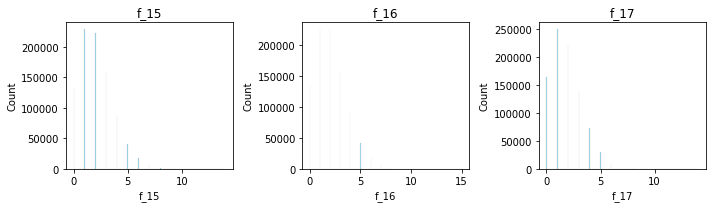

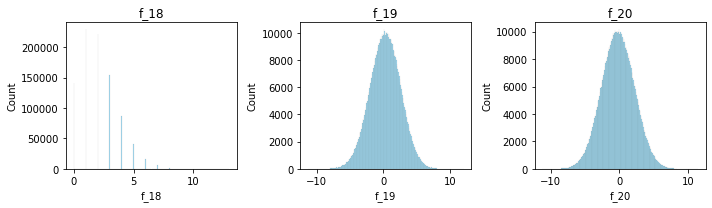

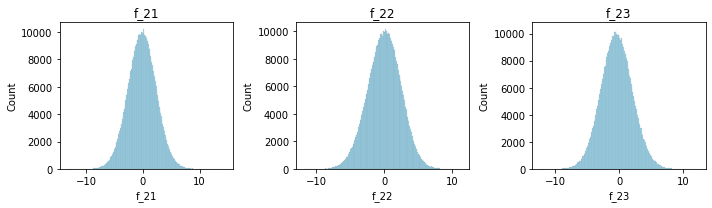

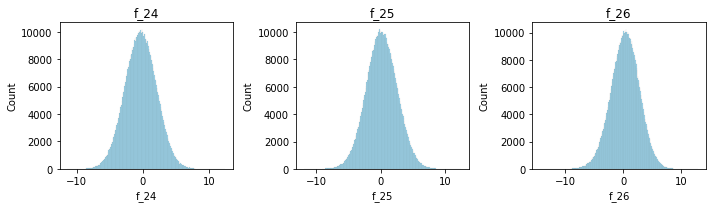

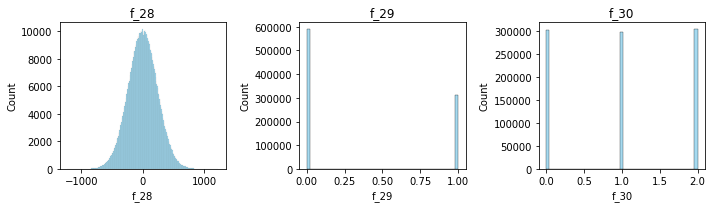

In [9]:
plot_df = corr_df.drop(['id','target'],axis=1)

i=0
while i < len(plot_df.columns):
    fig, axs = plt.subplots(1,3,figsize=(10, 3))
    sns.histplot(data=plot_df,x= plot_df[plot_df.columns[i]],color="skyblue",ax=axs[0])
    axs[0].set_title(plot_df.columns[i])
    #axs[0].set_xlim(xmin=-3.5,xmax=3.5)
    sns.histplot(data=plot_df,x=plot_df[plot_df.columns[i+1]],color="skyblue",ax=axs[1])
    axs[1].set_title(plot_df.columns[i+1])
    #axs[1].set_xlim(xmin=-3.5,xmax=3.5)
    sns.histplot(data=plot_df,x=plot_df[plot_df.columns[i+2]],color="skyblue",ax=axs[2])
    axs[2].set_title(plot_df.columns[i+2])
    
    i+=3
    plt.tight_layout()
    plt.show()

In [10]:
train['target'].value_counts()

0    462161
1    437839
Name: target, dtype: int64

In [11]:
y_train = train['target']
train = train.drop('target',axis=1)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

f_27 = le.fit_transform(train['f_27'])
train['f_27'] = f_27

In [13]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(train, y_train)
mi_scores = pd.Series(mi_scores, name="MI_score", index=train.columns)
mi_scores = mi_scores.sort_values(ascending=False)
df_mi_scores1 = pd.DataFrame(mi_scores).reset_index().rename(columns={'index':'feature'})
df_mi_scores1

,feature,MI_score
0,f_27,0.092400
1,f_21,0.013319
2,f_26,0.008588
3,f_23,0.006351
4,f_28,0.004939
5,f_19,0.004803
6,f_24,0.004743
7,f_22,0.004288
8,f_09,0.003349
9,f_08,0.002910


In [14]:
import eli5
from catboost import CatBoostClassifier
from eli5.sklearn import PermutationImportance

model1 = CatBoostClassifier(logging_level='Silent', random_state=42, eval_metric='AUC',loss_function='Logloss').fit(train,y_train)

perm1 = PermutationImportance(model1, random_state=1).fit(train, y_train)
eli5.show_weights(perm1, feature_names = train.columns.tolist(), top=None)

Weight,Feature
0.0881 ± 0.0002,f_30
0.0738 ± 0.0005,f_26
0.0528 ± 0.0004,f_21
0.0481 ± 0.0005,f_27
0.0442 ± 0.0005,f_22
0.0406 ± 0.0005,f_28
0.0332 ± 0.0002,f_24
0.0331 ± 0.0005,f_19
0.0309 ± 0.0005,f_25
0.0241 ± 0.0003,f_23


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

norm_df = StandardScaler().fit_transform(train)

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(norm_df)
pc_df = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2','pc3','pc4','pc5','pc6'])

In [16]:
train2 = pd.concat([pc_df, train], axis = 1)

In [17]:
model2 = CatBoostClassifier(logging_level='Silent', random_state=42, eval_metric='AUC',loss_function='Logloss').fit(train2,y_train)

perm1 = PermutationImportance(model2, random_state=1).fit(train2, y_train)
eli5.show_weights(perm1, feature_names = train2.columns.tolist(), top=None)

Weight,Feature
0.0881 ± 0.0005,f_30
0.0733 ± 0.0004,f_26
0.0510 ± 0.0005,f_21
0.0445 ± 0.0003,f_27
0.0435 ± 0.0005,f_28
0.0420 ± 0.0003,f_22
0.0311 ± 0.0001,f_24
0.0303 ± 0.0003,f_19
0.0299 ± 0.0005,f_25
0.0228 ± 0.0003,f_01
